In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
from nltk.corpus import opinion_lexicon
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from PIL import Image
import numpy as np

plt.style.use('ggplot')


In [4]:
df = pd.read_csv('./data/B09G9FPHY6_2023-12-01.csv')
df.shape

(336, 10)

# Positive Score Graph

In [ ]:
positive_score = df.loc[df['label'] == 'positive', ['date', 'score']]
fig = plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
sns.lineplot(x='date', y='score', data=positive_score, color='green', errorbar=None,  linestyle='--', marker='o')
sns.barplot(x='date', y='score', data=positive_score,errorbar=None, hue='date', legend=False, alpha=0.7, palette=sns.color_palette("crest", n_colors=len(positive_score)))
plt.xlabel('Date Range: ' + str(positive_score['date'].min()) + ' to ' + str(positive_score['date'].max()), fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.ylabel('Positivity',fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.title('Positive Score Graph', fontsize=20, color='green', fontweight='bold' )
plt.xticks(rotation=90)
plt.gca().set_xticklabels([])
# plt.show()
print(fig)
l = list()
l.append(fig)
print(l[0])

# Negative Score Graph

In [ ]:
negative_score = df.loc[df['label'] == 'negative', ['date', 'score']]
plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
sns.lineplot(x='date', y='score', data=negative_score, color='green', errorbar=None,  linestyle='--', marker='o')
sns.barplot(x='date', y='score', data=negative_score,errorbar=None, hue='date', legend=False, alpha=0.7, palette=sns.color_palette("crest", n_colors=len(negative_score)))
plt.xlabel('Date Range: ' + str(negative_score['date'].min()) + ' to ' + str(negative_score['date'].max()), fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.ylabel('Negativity',fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.title('Negative Score Graph', fontsize=20, color='green', fontweight='bold' )
plt.xticks(rotation=90)
plt.gca().set_xticklabels([])

# plt.show()
plt.savefig('analysis.png')

# Rating vs Date

In [ ]:
ratingVSdate = df[['date', 'rating']]
plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
sns.lineplot(x='date', y='rating', data=ratingVSdate, color='green', errorbar=None, label='Line', linestyle='--', marker='o')
# sns.barplot(x='date', y='rating', data=ratingVSdate,errorbar=None, hue='date', legend=False, alpha=0.7, palette=sns.color_palette("crest", n_colors=len(ratingVSdate)//2))
plt.xlabel('Time', fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.ylabel('Rating',fontsize=14, labelpad=10, color='green', fontweight='bold')
plt.title('Rating VS Date', fontsize=20, color='green', fontweight='bold' )
plt.xticks(rotation=90)
plt.gca().set_xticklabels([])
plt.show()

# Top Reviews 

In [ ]:
Top_positive_review = df.loc[(df['label'] == 'positive') & (df['rating'] == 5.0)]
Top_positive_review.sort_values(by='score', ascending=False, inplace=True)
Top_positive_review = Top_positive_review [['date', 'title','text', 'location' ]]
Top_positive_review.head(10)

In [ ]:
Top_negative_review = df.loc[(df['label'] == 'negative') & (df['rating'] == 1.0)]
Top_negative_review.sort_values(by='score', ascending=False, inplace=True)
Top_negative_review = Top_negative_review [['date', 'title','text', 'location' ]]
Top_negative_review.head(10)

# Critcal Reviews

In [ ]:
Critical_Positive = df.loc[(df['label'] == 'positive')]
Critical_Positive.sort_values(by='score', ascending=False, inplace=True)
Critical_Positive = Critical_Positive [['date', 'title','text', 'rating', 'location' ]]
Critical_Positive.head(1)

In [ ]:
Critical_Negative = df.loc[(df['label'] == 'negative')]
Critical_Negative.sort_values(by='score', ascending=False, inplace=True)
Critical_Negative = Critical_Negative [['date', 'title','text', 'rating', 'location' ]]
Critical_Negative.head(1)

# Word Cloud

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('opinion_lexicon')


In [75]:
wordcloud = WordCloud(max_font_size = 50, max_words = 1000)

In [5]:
positive_reviews = df.loc[df['label'] == 'positive', ['translated_text']]
negative_reviews = df.loc[df['label'] == 'negative', ['translated_text']]

In [4]:
positive_reviews_list = df.loc[df['label'] == 'positive', ['translated_text']]['translated_text'].tolist()
word= []
for i in positive_reviews_list:
    word.append(word_tokenize(i.lower()))
word_list = [i for sublist in word for i in sublist]
stop_words = set()
stemmer = set()
stop_words.update(stopwords.words('english'))
stemmer = SnowballStemmer('english')

filtered_words = []

for word in word_list: 
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

positive_words = set(opinion_lexicon.positive())

positive_word_list = [word for word in filtered_words if word in positive_words]


text = ' '.join(positive_word_list)

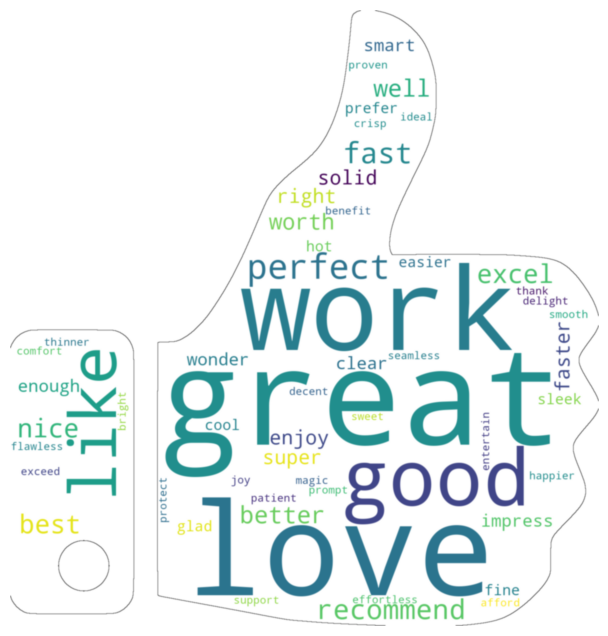

In [5]:
THUMBS_UP_FILE = './Images/thumbs-up.png'
icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size = icon.size, color=(255,255,255))
image_mask.paste(icon, box = icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(stopwords=stop_words, mask = rgb_array, background_color='white',contour_width=1, contour_color='black',
                        colormap='viridis')
word_cloud.generate(text)

plt.figure(figsize=([8, 8]))

plt.imshow(word_cloud, interpolation='bicubic')
plt.axis('off')
plt.show()

In [6]:
negative_reviews_list = df.loc[df['label'] == 'negative', ['translated_text']]['translated_text'].tolist()
word= []
for i in negative_reviews_list:
    word.append(word_tokenize(i.lower()))
word_list = [i for sublist in word for i in sublist]
stop_words = set()
stemmer = set()
stop_words.update(stopwords.words('english'))
stemmer = SnowballStemmer('english')

filtered_words = []

for word in word_list: 
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

negative_words = set(opinion_lexicon.negative())

negative_word_list = [word for word in filtered_words if word in negative_words]

text_negative = ' '.join(negative_word_list)

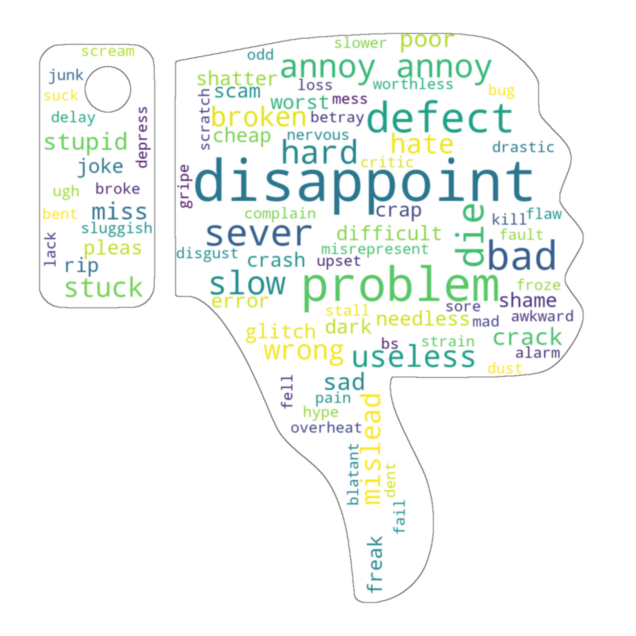

In [7]:
THUMBS_DOWN_FILE = './Images/thumbs-down.png'
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size = icon.size, color=(255,255,255))
image_mask.paste(icon, box = icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask = rgb_array, background_color='white',contour_width=1, contour_color='black',
                      colormap='viridis')
word_cloud.generate(text_negative)

plt.figure(figsize=([8, 8]))

plt.imshow(word_cloud, interpolation='bicubic')
plt.axis('off')
plt.show()